# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score, precision_score, recall_score, f1_score

# Importing data

In [3]:
train = pd.read_csv(r'C:\Users\njhar\Downloads\train_FD001.txt', sep=" ")
test = pd.read_csv(r'C:\Users\njhar\Downloads\test_FD001.txt', sep=" ")
RUL = pd.read_csv(r'C:\Users\njhar\Downloads\RUL_FD001.txt', sep=" ")

In [4]:
train

,1,1.1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.00,39.06,23.4190,Unnamed: 26,Unnamed: 27
0,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
1,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
2,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
3,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN
4,1,6,-0.0043,-0.0001,100.0,518.67,642.10,1584.47,1398.37,14.62,...,8132.85,8.4108,0.03,391,2388,100.0,38.98,23.3669,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20625,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,NaN,NaN
20626,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,NaN,NaN
20627,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,NaN,NaN
20628,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,NaN,NaN


In [5]:
test

,1,1.1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8125.55,8.4052,0.03,392,2388,100.00,38.86,23.3735,Unnamed: 26,Unnamed: 27
0,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,NaN,NaN
1,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,NaN,NaN
2,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,NaN,NaN
3,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,NaN,NaN
4,1,6,0.0012,0.0003,100.0,518.67,642.11,1579.12,1395.13,14.62,...,8127.46,8.4238,0.03,392,2388,100.0,38.91,23.3467,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13090,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974,NaN,NaN
13091,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771,NaN,NaN
13092,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051,NaN,NaN
13093,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699,NaN,NaN


In [6]:
RUL

,112,Unnamed: 1
0,98,NaN
1,69,NaN
2,82,NaN
3,91,NaN
4,93,NaN
...,...,...
94,137,NaN
95,82,NaN
96,59,NaN
97,117,NaN


# Initail dropping., because columns full of null values

In [7]:
train.drop(columns=['Unnamed: 26','Unnamed: 27'],inplace=True)
test.drop(columns=['Unnamed: 26','Unnamed: 27'],inplace=True)
RUL.drop(columns=['Unnamed: 1'],inplace=True)

# Giving names to the features

In [8]:
# This is for Train and Test data

index_names = ['engine', 'cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names= ['s1',
               's2',
               's3',
               's4',
               's5',
               's6',
               's7',
               's8',
               's9',
               's10',
               's11',
               's12',
               's13',
               's14',
               's15',
               's16',
               's17',
               's18',
               's19',
               's20',
               's21']
col_names = index_names + setting_names + sensor_names

In [9]:
# This is for Existing RUL

index_name = ['RUL']
col_name = index_name

In [10]:
# Assigning column names for the Train, Test data and RUL

In [11]:
train.columns = col_names
test.columns = col_names
RUL.columns = col_name

In [12]:
train

,engine,cycles,setting_1,setting_2,setting_3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
1,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
2,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
3,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
4,1,6,-0.0043,-0.0001,100.0,518.67,642.10,1584.47,1398.37,14.62,...,521.68,2388.03,8132.85,8.4108,0.03,391,2388,100.0,38.98,23.3669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20625,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20626,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20627,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20628,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [13]:
test

,engine,cycles,setting_1,setting_2,setting_3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
1,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
2,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
3,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130
4,1,6,0.0012,0.0003,100.0,518.67,642.11,1579.12,1395.13,14.62,...,521.92,2388.08,8127.46,8.4238,0.03,392,2388,100.0,38.91,23.3467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13090,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,520.69,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974
13091,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,521.05,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771
13092,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,521.18,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051
13093,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,521.33,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699


In [14]:
RUL

,RUL
0,98
1,69
2,82
3,91
4,93
...,...
94,137
95,82
96,59
97,117


# Basic Statistics

In [15]:
# Train Data
train.describe().T

,count,mean,std,min,25%,50%,75%,max
engine,20630.0,51.509016,2.922623e+01,1.0000,26.0000,52.00000,77.0000,100.0000
cycles,20630.0,108.813088,6.887857e+01,1.0000,52.0000,104.00000,156.0000,362.0000
setting_1,20630.0,-0.000009,2.187361e-03,-0.0087,-0.0015,-0.00000,0.0015,0.0087
setting_2,20630.0,0.000002,2.930558e-04,-0.0006,-0.0002,0.00000,0.0003,0.0006
setting_3,20630.0,100.000000,0.000000e+00,100.0000,100.0000,100.00000,100.0000,100.0000
s1,20630.0,518.670000,6.537152e-11,518.6700,518.6700,518.67000,518.6700,518.6700
s2,20630.0,642.680975,5.000295e-01,641.2100,642.3300,642.64000,643.0000,644.5300
s3,20630.0,1590.523159,6.131295e+00,1571.0400,1586.2600,1590.10000,1594.3800,1616.9100
s4,20630.0,1408.934186,9.000636e+00,1382.2500,1402.3600,1408.04000,1414.5575,1441.4900
s5,20630.0,14.620000,3.394700e-12,14.6200,14.6200,14.62000,14.6200,14.6200


In [16]:
# Test Data
test.describe().T

,count,mean,std,min,25%,50%,75%,max
engine,13095.0,51.547766,2.828705e+01,1.0000,28.0000,52.0000,76.0000,100.0000
cycles,13095.0,76.842306,5.305564e+01,1.0000,33.0000,69.0000,113.0000,303.0000
setting_1,13095.0,-0.000011,2.202677e-03,-0.0082,-0.0015,0.0000,0.0015,0.0078
setting_2,13095.0,0.000004,2.940304e-04,-0.0006,-0.0002,0.0000,0.0003,0.0007
setting_3,13095.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
s1,13095.0,518.670000,6.014263e-11,518.6700,518.6700,518.6700,518.6700,518.6700
s2,13095.0,642.475046,4.008864e-01,641.1300,642.1950,642.4600,642.7400,644.3000
s3,13095.0,1588.099419,5.003405e+00,1569.0400,1584.6000,1587.9900,1591.3650,1607.5500
s4,13095.0,1404.735860,6.688322e+00,1384.3900,1399.9500,1404.4400,1409.0500,1433.3600
s5,13095.0,14.620000,2.671743e-12,14.6200,14.6200,14.6200,14.6200,14.6200


In [17]:
# RUL
RUL.describe()

,RUL
count,99.000000
mean,75.151515
std,41.813816
min,7.000000
25%,31.500000
50%,85.000000
75%,112.000000
max,145.000000


# Understanding the data

In [18]:
# Checking the Null values
train.isnull().sum()

engine       0
cycles       0
setting_1    0
setting_2    0
setting_3    0
s1           0
s2           0
s3           0
s4           0
s5           0
s6           0
s7           0
s8           0
s9           0
s10          0
s11          0
s12          0
s13          0
s14          0
s15          0
s16          0
s17          0
s18          0
s19          0
s20          0
s21          0
dtype: int64

In [19]:
test.isnull().sum()

engine       0
cycles       0
setting_1    0
setting_2    0
setting_3    0
s1           0
s2           0
s3           0
s4           0
s5           0
s6           0
s7           0
s8           0
s9           0
s10          0
s11          0
s12          0
s13          0
s14          0
s15          0
s16          0
s17          0
s18          0
s19          0
s20          0
s21          0
dtype: int64

In [20]:
RUL.isnull().sum()

RUL    0
dtype: int64

In [21]:
# Checking the Unique values
train.nunique()

engine        100
cycles        362
setting_1     158
setting_2      13
setting_3       1
s1              1
s2            310
s3           3012
s4           4051
s5              1
s6              2
s7            513
s8             53
s9           6403
s10             1
s11           159
s12           427
s13            56
s14          6078
s15          1918
s16             1
s17            13
s18             1
s19             1
s20           120
s21          4745
dtype: int64

In [22]:
test.nunique()

engine        100
cycles        303
setting_1     150
setting_2      14
setting_3       1
s1              1
s2            262
s3           2361
s4           2954
s5              1
s6              2
s7            415
s8             41
s9           4047
s10             1
s11           136
s12           357
s13            43
s14          3786
s15          1506
s16             1
s17             9
s18             1
s19             1
s20           103
s21          3555
dtype: int64

In [23]:
RUL.nunique()

RUL    70
dtype: int64

# Dropping Unwanted Sensors

In [24]:
# Dropping sensors from the Train data
train_unwanted=[]
for i in train.select_dtypes(include=np.number):
    if train[i].nunique()==1:
        train_unwanted.append(i)
print(train_unwanted)

['setting_3', 's1', 's5', 's10', 's16', 's18', 's19']


In [25]:
# Dropping sensors from the Test data
test_unwanted=[]
for i in test.select_dtypes(include=np.number):
    if test[i].nunique()==1:
        test_unwanted.append(i)
print(test_unwanted)

['setting_3', 's1', 's5', 's10', 's16', 's18', 's19']


In [26]:
# so we will drop such columns
train.drop(columns=train_unwanted, inplace=True)
test.drop(columns=test_unwanted, inplace=True)

In [27]:
train.shape

(20630, 19)

In [28]:
test.shape

(13095, 19)

#  Establishing Remaining Useful Life (RUL) in Cycles

First, we determine in the train set for each row the maximum cycles for the particular unit. We use the groupby command to obtain for every unit the maximum number of cycles, and in turn use pd.merge to bring these values into the original train set

We then determine the time to failure (TTF) for every row, which is the number of cycles subtracted from the maximum number of cycles in a particular unit.

                TTF = MAX( cycles ) - cycles

In [29]:
# Time to Failure
train = pd.merge(train, train.groupby('engine',as_index=False)['cycles'].max(),how='left', on='engine')
train.rename(columns={"cycles_x": "cycles", "cycles_y": "maxcycles"},inplace=True)

C:\Users\njhar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


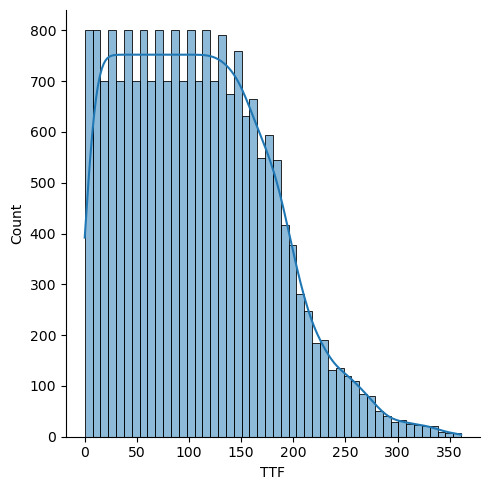

In [30]:
train['TTF'] = train['maxcycles'] - train['cycles']
sns.displot(train['TTF'],kde=True)

# Data Scaling using MinMaxScale

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [32]:
train.iloc[:,2:19] = scaler.fit_transform(train.iloc[:,2:19])

In [33]:
test.iloc[:,2:19] = scaler.transform(test.iloc[:,2:19])

# Fraction Time-to-Failure (FTTF)

Fraction of Time-to-Failure (FTTF) is a normalized version of the Time-to-Failure (TTF), used in predictive maintenance and equipment degradation analysis. Instead of expressing TTF as the absolute number of cycles remaining until failure, FTTF represents the relative fraction of the engine’s remaining life. It is calculated as a value between 0 and 1, where:

FTTF = 1 means the engine is at the start of its life (no degradation).
FTTF = 0 means the engine has reached the end of its life (failure point).

                   Max Life (cycles)
          FTTF = ___________________       
                        TTF


In [34]:
# Initialize an empty list to store fTTF values
fTTF = []

# Loop through each unique unit (engine)
for i in range(train['engine'].min(), train['engine'].max() + 1):
    # Filter data for each unit
    dat = train[train['engine'] == i].reset_index(drop=True)
    
    # Get the min and max TTF for the current unit
    min_TTF = dat['TTF'].min()
    max_TTF = dat['TTF'].max()
    
    # Calculate the fTTF for each cycle in the unit's data
    for q in range(len(dat)):
        # Calculate the fraction TTF without using a function
        fTTFz = (dat['TTF'][q] - min_TTF) / float(max_TTF - min_TTF)
        fTTF.append(fTTFz)  # Append result to fTTF list

# Assign the calculated fTTF values to a new column in the train dataframe
train['fTTF'] = fTTF

# Example of sum for specific rows (if needed)
mx = train.iloc[0:4, 1].sum()

# Output the result
print(train[['engine', 'cycles', 'TTF', 'fTTF']].head())

   engine  cycles  TTF      fTTF
0       1       2  190  1.000000
1       1       3  189  0.994737
2       1       4  188  0.989474
3       1       5  187  0.984211
4       1       6  186  0.978947


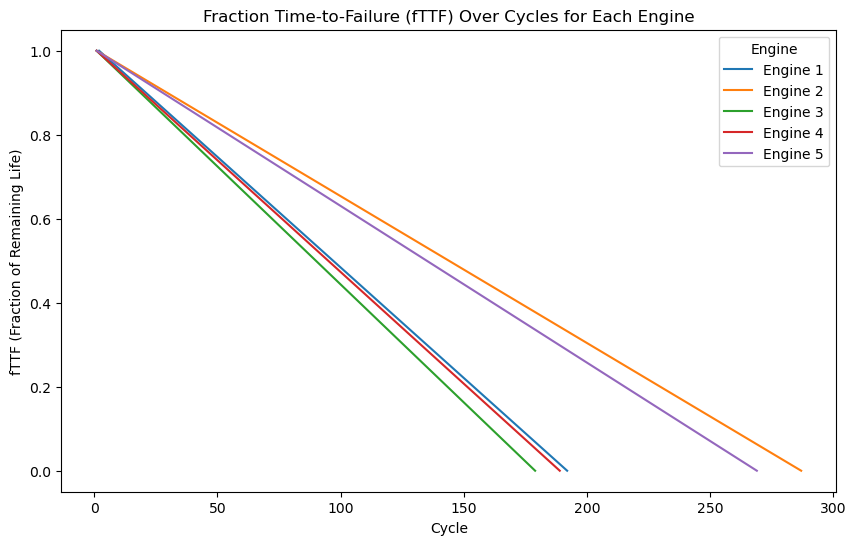

In [35]:
# Step 6: Plot the fTTF values for each engine as a line chart
plt.figure(figsize=(10, 6))
# Get the unique engine IDs and limit to the first 5
engines_to_plot = train['engine'].unique()[:5]
# Loop through each engine to plot its fTTF over cycles
for i in engines_to_plot:
    engine_data = train[train['engine'] == i]
    plt.plot(engine_data['cycles'], engine_data['fTTF'], label=f'Engine {i}')

# Add labels, title, and legend
plt.title('Fraction Time-to-Failure (fTTF) Over Cycles for Each Engine')
plt.xlabel('Cycle')
plt.ylabel('fTTF (Fraction of Remaining Life)')
plt.legend(title="Engine")
plt.grid(False)

# Display the plot
plt.show()

The following plot shows FTTF in cycles, for the first 5 units.
The above fraction TTF that starts at 1.00 and ends at 0.00. However, the number of cycles that it takes to failure remains identical. 
Some units have a longer duration than others, as can be clearly seen in the X-axes of the zigzag figure.

# train and test data spliting

In [36]:
X_train = train.values[:,1:19]
X_train

array([[2.00000000e+00, 6.09195402e-01, 2.50000000e-01, ...,
        3.33333333e-01, 6.66666667e-01, 7.31013532e-01],
       [3.00000000e+00, 2.52873563e-01, 7.50000000e-01, ...,
        1.66666667e-01, 6.27906977e-01, 6.21375311e-01],
       [4.00000000e+00, 5.40229885e-01, 5.00000000e-01, ...,
        3.33333333e-01, 5.73643411e-01, 6.62386081e-01],
       ...,
       [1.98000000e+02, 5.22988506e-01, 5.00000000e-01, ...,
        8.33333333e-01, 2.32558140e-01, 5.39906103e-02],
       [1.99000000e+02, 4.36781609e-01, 7.50000000e-01, ...,
        5.83333333e-01, 1.16279070e-01, 2.34465617e-01],
       [2.00000000e+02, 3.16091954e-01, 8.33333333e-02, ...,
        6.66666667e-01, 1.78294574e-01, 2.18171776e-01]])

In [37]:
X_train.shape

(20630, 18)

In [38]:
Y_train = train.values[:, 21]
Y_train

array([1.        , 0.99473684, 0.98947368, ..., 0.01005025, 0.00502513,
       0.        ])

In [39]:
Y_train.shape

(20630,)

In [40]:
X_test = test.values[:,1:19]
X_test

array([[  2.        ,   0.34482759,   0.25      , ...,   0.41666667,
          0.68217054,   0.68682684],
       [  3.        ,   0.51724138,   0.58333333, ...,   0.41666667,
          0.72868217,   0.72134769],
       [  4.        ,   0.74137931,   0.5       , ...,   0.25      ,
          0.66666667,   0.66210991],
       ...,
       [196.        ,   0.46551724,   0.25      , ...,   0.58333333,
          0.37209302,   0.4293013 ],
       [197.        ,   0.2816092 ,   0.58333333, ...,   0.58333333,
          0.40310078,   0.51877934],
       [198.        ,   0.57471264,   0.75      , ...,   0.66666667,
          0.43410853,   0.40223695]])

In [41]:
X_test.shape

(13095, 18)

# Modeling

In my last project i got 89% of accuracy. so i used the RandomForestRegressor to get the Remaining Useful Life.

In [42]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train, Y_train)

RandomForestRegressor()

Remind that the values Y_train were before transformed to a fraction of remaining useful life, from 1.0 till 0.00, in order to cancel out the possible effect of total cycle duration. So score should also contain values in this range:

In [43]:
score = regressor.predict(X_test)

In [44]:
score[0:10]

array([0.99535336, 0.98965725, 0.98523623, 0.98023218, 0.97498527,
       0.96871052, 0.96577706, 0.96101207, 0.95494454, 0.95191278])

In [45]:
test = pd.merge(test, test.groupby('engine',as_index=False)['cycles'].max(), how='left', on='engine')
test.rename(columns={"cycles_x": "cycles", "cycles_y": "maxcycles"}, inplace=True)
test['score'] = score
test.head()

,engine,cycles,setting_1,setting_2,s2,s3,s4,s6,s7,s8,...,s11,s12,s13,s14,s15,s17,s20,s21,maxcycles,score
0,1,2,0.344828,0.250000,0.150602,0.379551,0.222316,1.0,0.805153,0.166667,...,0.386905,0.739872,0.264706,0.204768,0.213159,0.416667,0.682171,0.686827,31,0.995353
1,1,3,0.517241,0.583333,0.376506,0.346632,0.322248,1.0,0.685990,0.227273,...,0.386905,0.699360,0.220588,0.155640,0.458638,0.416667,0.728682,0.721348,31,0.989657
2,1,4,0.741379,0.500000,0.370482,0.285154,0.408001,1.0,0.679549,0.196970,...,0.255952,0.573561,0.250000,0.170090,0.257022,0.250000,0.666667,0.662110,31,0.985236
3,1,5,0.580460,0.500000,0.391566,0.352082,0.332039,1.0,0.694042,0.166667,...,0.273810,0.737740,0.220588,0.152751,0.300885,0.166667,0.658915,0.716377,31,0.980232
4,1,6,0.568966,0.750000,0.271084,0.176150,0.217421,1.0,0.703704,0.151515,...,0.244048,0.688699,0.294118,0.142017,0.380531,0.333333,0.596899,0.624827,31,0.974985


# Finding the Remaining Useful Life

I am going to predict the Remaining useful life using the Test data and also going to compare with my Predicted RUL and Existing RUL

In [46]:
def totcycles(data):
 return(data['cycles'] / (1-data['score']))
test['maxpredcycles'] = totcycles(test)

In [47]:
def RULfunction(data):
 return(data['maxpredcycles'] - data['maxcycles'])
test['RUL'] = RULfunction(test)

In [48]:
test['RUL'].head()

0    399.418947
1    259.058136
2    239.933551
3    221.936328
4    208.858703
Name: RUL, dtype: float64

In [49]:
# Identify the index of the 'RUL' column
t = test.columns == 'RUL'
ind = [i for i, x in enumerate(t) if x][0]  # Get the index of the 'RUL' column

# Initialize an empty list to store the predicted RUL for each unit
predictedRUL = []

# Loop through each unit in the test set
for i in range(test['engine'].min(), test['engine'].max() + 1):
    # Select the data for the current unit
    unit_data = test[test['engine'] == i]
    
    # Find the index of the last cycle row for the current unit
    last_cycle_row = unit_data[unit_data['cycles'] == unit_data['cycles'].max()]
    
    # Extract the predicted RUL for the last cycle of the current unit using the row's index
    npredictedRUL = last_cycle_row.iloc[0, ind]  # Using .iloc[0] to get the first row of that cycle
    
    # Append the predicted RUL to the list
    predictedRUL.append(npredictedRUL)

# Print the predicted RULs
print(predictedRUL)

[158.1567658475369, 150.85664145818697, 55.460685455562725, 83.68266753052427, 96.69362886282931, 87.7960324338869, 101.37392665690527, 49.37400988490327, 129.64897307211874, 100.71248718521548, 73.54631616608185, 108.14196885481891, 98.06246299148427, 150.46279545272088, 146.24902409037415, 97.44179924834006, 48.42881977595448, 64.08219204160446, 103.34806554859833, 19.419001026105008, 57.7392806133449, 162.78318987655342, 151.63578223797413, 22.498606567066986, 148.00973772784934, 113.81169964933906, 75.66542316496913, 73.36872340350521, 82.92503460627535, 64.89372360984203, 17.784938081165393, 45.015513931590675, 123.97442735726949, 6.455194389544033, 7.44503200289148, 20.453729196965128, 47.302702931002614, 66.01406066886511, 161.68019875713833, 22.716388743051454, 63.48705804952584, 20.346832873315606, 54.233129898471276, 137.20127047771234, 68.75243485767095, 47.78078238103885, 113.84159235200306, 113.11782997427349, 25.72700518714481, 111.40639935847724, 73.82883580908441, 33.16

In [50]:
# Convert the true RUL values into a list
xtrueRUL = list(RUL['RUL'])

# Create a list for the reversed true RUL values
otrueRUL = []

# Loop through true RUL values and generate reversed ranges
for i in range(len(xtrueRUL)):
    otrueRUL = np.concatenate((otrueRUL, list(reversed(np.arange(int(xtrueRUL[i]))))))

# Convert predicted RUL values into a list of integers (rounded)
xpredictedRUL = [round(x) for x in predictedRUL]

# Create a list for the reversed predicted RUL values
opredictedRUL = []

# Loop through predicted RUL values and generate reversed ranges
for i in range(len(xpredictedRUL)):
    opredictedRUL = np.concatenate((opredictedRUL, list(reversed(np.arange(int(xpredictedRUL[i]))))))

# Create a new list for the integer predicted RUL values
xpredictedRUL1 = [int(x) for x in xpredictedRUL]

# Convert the list to a numpy array
xpredictedRUL2 = np.array(xpredictedRUL1)

# Print out the results to verify
print(f"True RUL list (reversed): {otrueRUL}")
print(f"Predicted RUL list (reversed): {opredictedRUL}")
print(f"Predicted RUL (integer array): {xpredictedRUL2}")

True RUL list (reversed): [97. 96. 95. ...  2.  1.  0.]
Predicted RUL list (reversed): [157. 156. 155. ...   2.   1.   0.]
Predicted RUL (integer array): [158 151  55  84  97  88 101  49 130 101  74 108  98 150 146  97  48  64
 103  19  58 163 152  22 148 114  76  73  83  65  18  45 124   6   7  20
  47  66 162  23  63  20  54 137  69  48 114 113  26 111  74  33  32 133
 121  14  60  42 142  71  47  71  51  39 160  18 131  16 134  85 134  70
 134  88 112  14  36 148  87  67   8   8 124  47 162  80 149 138  74  31
  30  20  57  40 114 133  82  73 123  15]


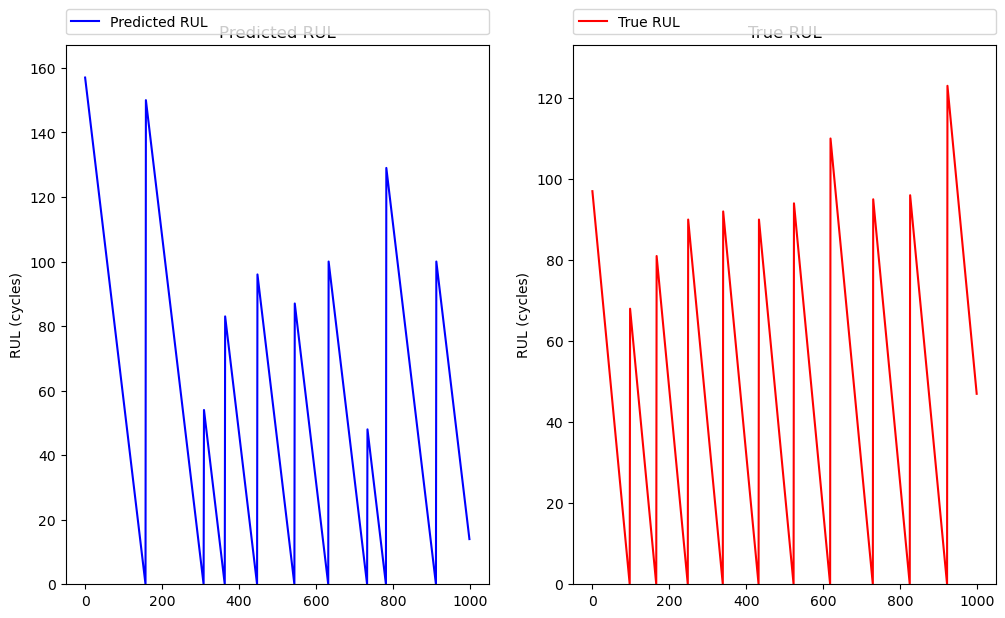

In [51]:
# Set a maximum limit for plotting
mx = 1000

# Create the figure and set the size
fig = plt.figure(figsize=(12, 7))

# Subplot for predicted RUL
fig.add_subplot(1, 2, 1)
plt.plot(opredictedRUL[0:mx], color='blue')
plt.legend(['Predicted RUL'], bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0)
plt.ylim(0, opredictedRUL[0:mx].max() + 10)
plt.ylabel('RUL (cycles)')
plt.title('Predicted RUL')

# Subplot for true RUL
fig.add_subplot(1, 2, 2)
plt.plot(otrueRUL[0:mx], color='red')
plt.legend(['True RUL'], bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0)
plt.ylim(0, otrueRUL[0:mx].max() + 10)
plt.ylabel('RUL (cycles)')
plt.title('True RUL')

# Show the plot
plt.show()

# Comparison Predicted and True RUL

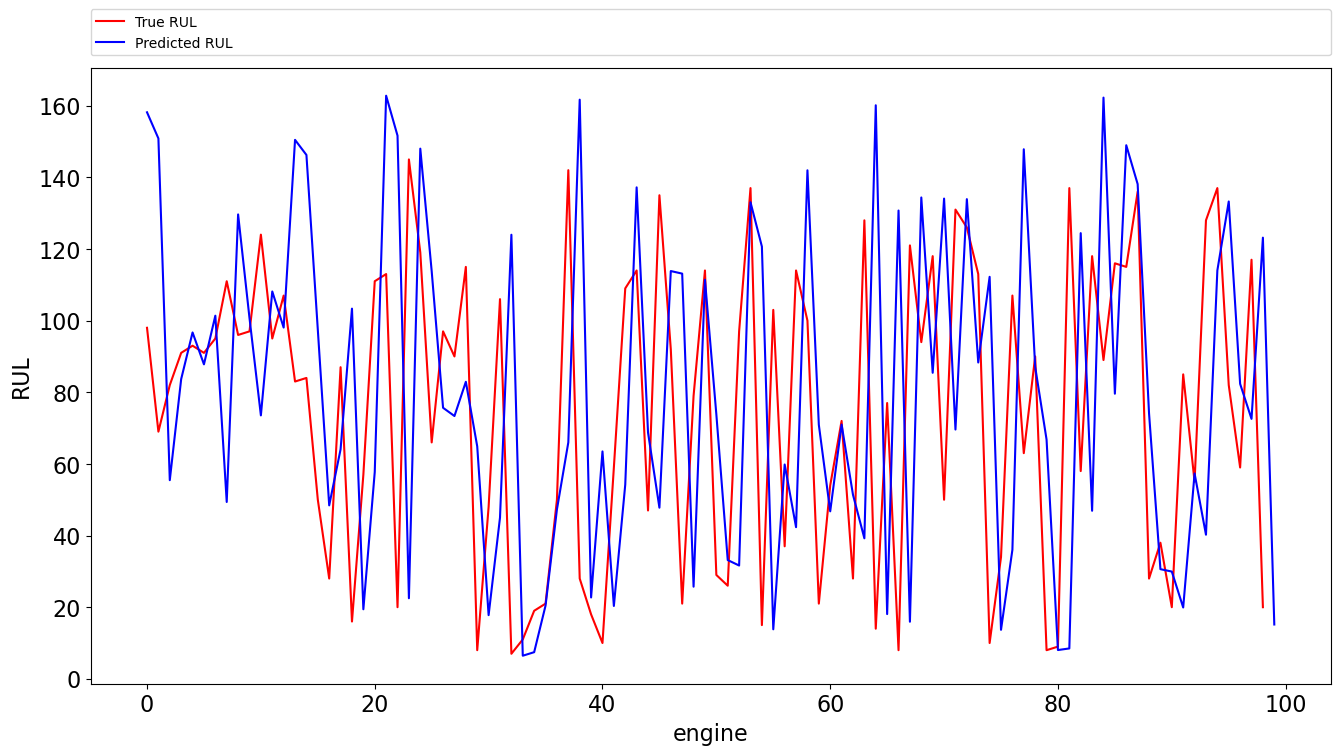

In [52]:
plt.figure(figsize = (16, 8))
plt.plot(RUL, color='red')
plt.plot(predictedRUL, color='blue')
plt.xlabel('engine', fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('RUL',fontsize=16)
plt.yticks(fontsize=16)
plt.legend(['True RUL','Predicted RUL'], bbox_to_anchor=(0., 1.02, 1., .102),
 loc=3, mode="expand", borderaxespad=0)
plt.show()

In [53]:
df1 = pd.concat([pd.Series(RUL['RUL']), pd.Series(xpredictedRUL2)], axis=1)
df1.columns = ['true', 'predicted']

In [53]:
df1['diff'] = df1['predicted']-df1['true']
df1.head()

,true,predicted,diff
0,98.0,173,75.0
1,69.0,150,81.0
2,82.0,56,-26.0
3,91.0,83,-8.0
4,93.0,101,8.0
